SM accuracy: 0.9166666666666666
BIG accuracy: 0.8666666666666667


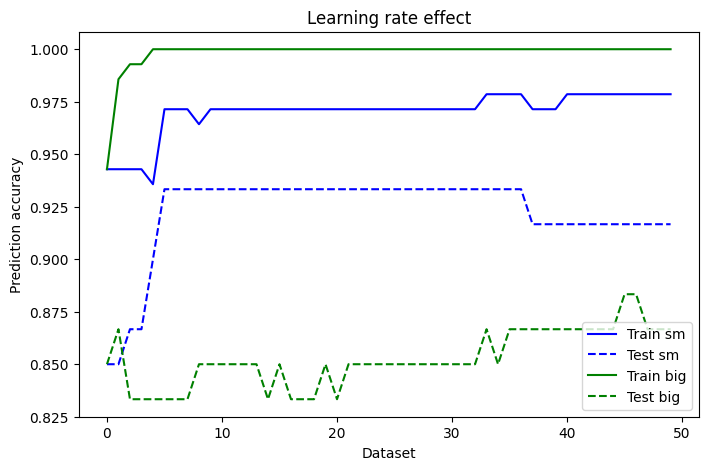

In [14]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_classification(
    n_samples=200, n_features=5, n_informative=3, n_redundant=0, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_sm = GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42)
model_big = GradientBoostingClassifier(learning_rate=1.0, n_estimators=50, random_state=42)

model_sm.fit(X_train, y_train)
model_big.fit(X_train, y_train)

print('SM accuracy:', accuracy_score(model_sm.predict(X_test), y_test))
print('BIG accuracy:', accuracy_score(model_big.predict(X_test), y_test))

y_pred_train_sm, y_pred_test_sm = [], []
y_pred_train_big, y_pred_test_big = [], []

for y_pred_train, y_pred_test in zip(
    model_sm.staged_predict(X_train),
    model_sm.staged_predict(X_test)
):
    y_pred_train_sm.append(accuracy_score(y_train, y_pred_train))
    y_pred_test_sm.append(accuracy_score(y_test, y_pred_test))

marks = ':()_'
for y_pred_train, y_pred_test in zip(
    model_big.staged_predict(X_train),
    model_big.staged_predict(X_test)
):
    y_pred_train_big.append(accuracy_score(y_train, y_pred_train))
    y_pred_test_big.append(accuracy_score(y_test, y_pred_test))

plt.figure(figsize=(8, 5))
plt.plot(y_pred_train_sm, label='Train sm', c='blue')
plt.plot(y_pred_test_sm, label='Test sm', c='blue', linestyle='--')
plt.plot(y_pred_train_big, label='Train big', c='green')
plt.plot(y_pred_test_big, label='Test big', c='green', linestyle='--')
plt.xlabel('Dataset')
plt.ylabel('Prediction accuracy')
plt.legend()
plt.title('Learning rate effect')
plt.show()